In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
df=pd.read_csv("/content/AttendanceMarksSA-200919-184800.csv")
print(df)

    Attendance  MSE  ESE
0           70   10   42
1           92    7   39
2           67    3   32
3           82   16   50
4           80    9   44
..         ...  ...  ...
68          80   10   47
69          78    8   40
70          92    9   49
71          78   11   53
72          78   12   58

[73 rows x 3 columns]


In [ ]:
df.shape

(73, 3)

In [ ]:
df.head()

,Attendance,MSE,ESE
0,70,10,42
1,92,7,39
2,67,3,32
3,82,16,50
4,80,9,44


In [ ]:
df.mean()

,0
Attendance,81.698630
MSE,9.780822
ESE,46.630137


In [ ]:
df.isnull().sum()

,0
Attendance,0
MSE,0
ESE,0


In [ ]:
df=df.drop_duplicates()
df.head()

,Attendance,MSE,ESE
0,70,10,42
1,92,7,39
2,67,3,32
3,82,16,50
4,80,9,44


In [ ]:
df.describe()

,Attendance,MSE,ESE
count,72.000000,72.000000,72.000000
mean,81.791667,9.777778,46.597222
std,9.540038,3.068340,6.657961
min,62.000000,3.000000,32.000000
25%,75.000000,7.750000,42.000000
50%,80.000000,10.000000,46.500000
75%,90.000000,11.250000,50.250000
max,98.000000,17.000000,64.000000


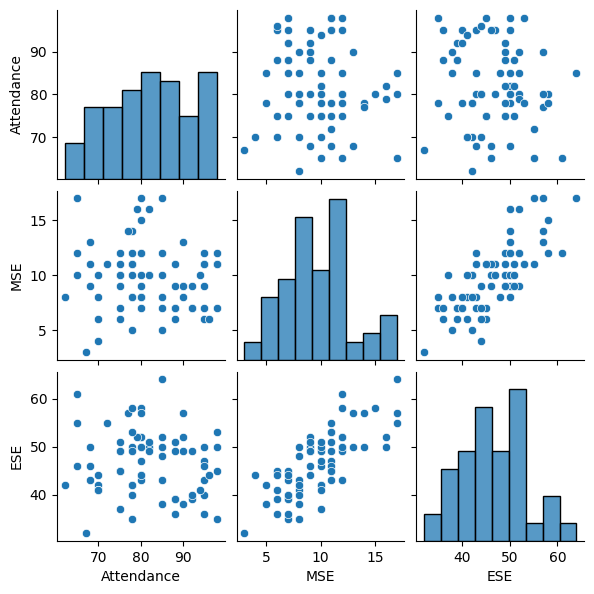

In [ ]:
sns.pairplot(data=df,height=2)

In [ ]:
x=df.iloc[:,:3]
y=df.iloc[:,2]

In [ ]:
x.head()

,Attendance,MSE,ESE
0,70,10,42
1,92,7,39
2,67,3,32
3,82,16,50
4,80,9,44


In [ ]:
y.head()

,ESE
0,42
1,39
2,32
3,50
4,44


In [ ]:
from sklearn import linear_model
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10,shuffle=True)

In [ ]:
MR=linear_model.LinearRegression()

In [ ]:
MR.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=MR.predict(x_test)
print(y_pred)

[49. 50. 42. 45. 32. 43. 50. 40. 51. 50. 44. 42. 39. 44. 52.]


In [ ]:
print(r2_score(y_test,y_pred))

1.0


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))


4.263256414560601e-15
3.029225876048685e-29
5.503840364735051e-15


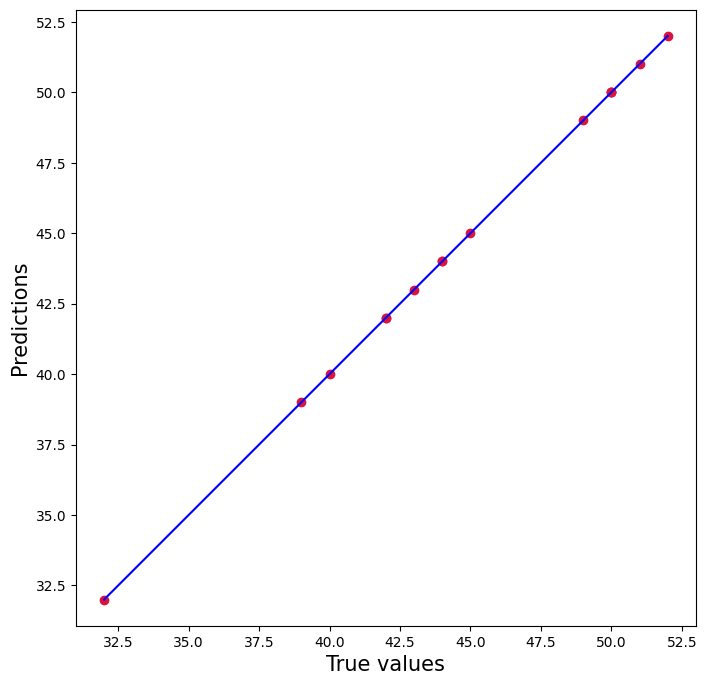

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,y_pred,c="crimson")
p1=max(max(y_pred),max(y_test))
p2=min(min(y_pred),min(y_test))
plt.plot([p1,p2],[p1,p2],'b-')
plt.xlabel("True values",fontsize=15)
plt.ylabel("Predictions",fontsize=15)
plt.axis("equal")
plt.show()
